In [ ]:
# 下載中文字體
!pip install wget
import wget

wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf") # 謝謝小白的字體

'ChineseFont (1).ttf'

In [ ]:
from matplotlib.font_manager import fontManager # 設定中文字型
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import csv

fontManager.addfont("ChineseFont.ttf") # 設定中文字型
mpl.rc('font', family="ChineseFont")

In [ ]:
import csv

file_path = '/content/stock_performance.csv'

# 建立一個空字典來存放日期和損益資料
data_dict = {}

# 使用with語句打開CSV檔案並逐行讀取資料到字典中
with open(file_path, 'r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    # 跳過表頭行
    next(reader)

    # 初始化前一天的損益變數
    prev_profit = 0

    for row in reader:

      # 提取日期和損益資料
      date = row[4]    # 4 為賣出日期欄位
      profit_str = row[2] # 2 是損益欄位

      # 檢查損益是否包含逗號
      if ',' in profit_str:
        profit = int(profit_str.replace(',', '')) # 如果包含逗號，先移除逗號然後轉換為整數
      else:
        profit = int(profit_str) # 如果不包含逗號，直接轉換為整數

      total_profit = profit + prev_profit # 計算每日損益並加上前一天的損益
      data_dict[date] = total_profit    # 將日期和損益存儲到字典中
      prev_profit = total_profit      # 更新前一天的損益變數

print("Data saved successfully!!")

Data saved successfully!!


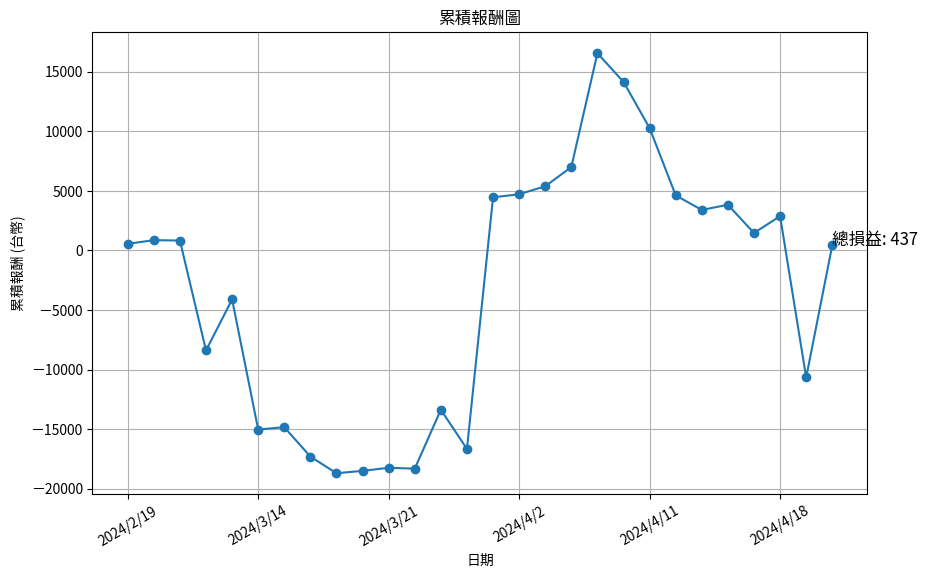

In [ ]:
# 提取日期和損益
dates = list(data_dict.keys())
profits = list(data_dict.values())

# 繪製折線圖
plt.figure(figsize=(10, 6))
plt.plot(dates, profits, marker='o', linestyle='-')
plt.xlabel('日期')
plt.ylabel('累積報酬 (台幣)')
plt.title('累積報酬圖')
plt.xticks(rotation=30)  # 將 x 軸標籤旋轉 45 度，以避免重疊
plt.grid(True)

# 設置日期間隔
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(7))  # 顯示最多7個日期

# 顯示最後一筆總損益
plt.text(dates[-1], profits[-1], f'總損益: {profits[-1]}', fontsize=12)

plt.show()
